# [Create Agent with Enterprise File Search](https://learn.microsoft.com/en-us/python/api/overview/azure/ai-projects-readme?view=azure-python-preview#create-agent-with-enterprise-file-search)
We can upload file to Azure as it is shown in this example, or use the existing Azure blob storage.<br/><br/>
**IMPORTANT**: the interactive user must have the `Storage Blob Data Contributor` role on the Azure Storage Account.
<br/><br/>
In the code below, we demonstrate how this can be achieved:
- first, we upload file to azure and create `VectorStoreDataSource`, which then is used to create a `VectorStore`;
- then, this vector store is given to the `FileSearchTool` constructor to creates embeddings for it.

# Constants

In [1]:
import os
from IPython.display import Markdown, display
from dotenv import load_dotenv # requires python-dotenv
from PIL import Image # requires pip install pillow
from datetime import datetime
from common.agents_helper_functions_NEW import *
import importlib.metadata
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if not load_dotenv("./../config/credentials_my.env"):
    print("Environment variables not loaded, cell execution stopped")
else:
    print("Environment variables have been loaded ;-)")


project_endpoint = os.environ["PROJECT_ENDPOINT"]
deployment_name =  os.environ["MODEL_DEPLOYMENT_NAME"]
api_version = os.environ["OPENAI_API_VERSION"] # at least "2025-03-01-preview"

print(f'Project Endpoint: <{project_endpoint}>')
print(f"azure-ai-projects library installed version: {importlib.metadata.version("azure-ai-projects")}")
print(f"azure-ai-agents library installed version: {importlib.metadata.version("azure-ai-agents")}")

Environment variables have been loaded ;-)
Project Endpoint: <https://mmai-swc-new01-prj-resource.services.ai.azure.com/api/projects/mmai-swc-new01-prj>
azure-ai-projects library installed version: 1.0.0b11
azure-ai-agents library installed version: 1.1.0b1


# Create AI Foundry Project Client

In [2]:
from azure.ai.projects import AIProjectClient
from azure.identity import DefaultAzureCredential

project_client = AIProjectClient(
    endpoint=project_endpoint,
    credential=DefaultAzureCredential(),
)

project_client

# Upload files/folders as a [Dataset](https://learn.microsoft.com/en-us/python/api/overview/azure/ai-projects-readme?view=azure-python-preview)

In [3]:
list(project_client.datasets.list())

[{'id': 'azureai://accounts/mmai-swc-new01-prj-resource/projects/mmai-swc-new01-prj/data/5/versions/5', 'name': '5', 'version': '5', 'displayName': '5', 'description': None, 'tags': None, 'type': 'uri_file', 'isReference': False, 'dataUri': 'https://mmaiswcnew01prj1storage.blob.core.windows.net/mmai-swc-n-eba90019-5056-588e-bdf8-2de10611f129/product_info_1.md', 'connectionName': None, 'systemData': {'createdAt': '2025-05-29T13:27:31.0617151+00:00', 'createdBy': 'Mauro Minella', 'createdByType': None, 'lastModifiedAt': '2025-05-29T13:27:31.0617151+00:00'}},
 {'id': 'azureai://accounts/mmai-swc-new01-prj-resource/projects/mmai-swc-new01-prj/data/4/versions/4', 'name': '4', 'version': '4', 'displayName': '4', 'description': None, 'tags': None, 'type': 'uri_file', 'isReference': False, 'dataUri': 'https://mmaiswcnew01prj1storage.blob.core.windows.net/mmai-swc-n-6a0f6d6b-ef85-5418-8e60-e9beccd4367e/product_info_1.md', 'connectionName': None, 'systemData': {'createdAt': '2025-05-29T13:05:47.

In [5]:
from azure.ai.projects.models import DatasetVersion

dataset_name = "mydataset"
dataset_version = 6
file_path="./product_info_1.md"
connection_name="mmaiswcnew01prj1storage"

print(
    f"Upload a single file and create a new Dataset `{dataset_name}`, version `{dataset_version}`, to reference the file."
)
dataset: DatasetVersion = project_client.datasets.upload_file(
    name=dataset_version,
    version=dataset_version,
    file_path=file_path,
    connection_name=connection_name,
)

dataset # we will use dataset.data_uri

Upload a single file and create a new Dataset `mydataset`, version `6`, to reference the file.


{'id': 'azureai://accounts/mmai-swc-new01-prj-resource/projects/mmai-swc-new01-prj/data/6/versions/6', 'name': '6', 'version': '6', 'displayName': '6', 'description': None, 'tags': None, 'type': 'uri_file', 'isReference': False, 'dataUri': 'https://mmaiswcnew01prj1storage.blob.core.windows.net/mmai-swc-n-ead8226a-f700-57d5-964b-908b853d32ba/product_info_1.md', 'connectionName': None, 'systemData': {'createdAt': '2025-05-30T05:48:22.4344808+00:00', 'createdBy': 'Mauro Minella', 'createdByType': None, 'lastModifiedAt': '2025-05-30T05:48:22.4344808+00:00'}}

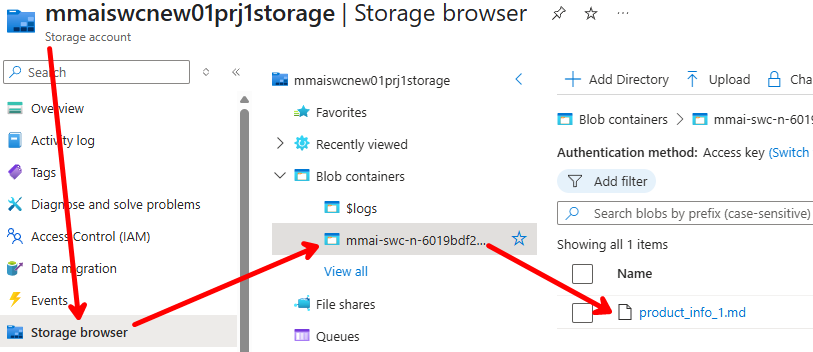

# [Enterprise File Search](https://learn.microsoft.com/en-us/python/api/overview/azure/ai-agents-readme?view=azure-python-preview#create-agent-with-enterprise-file-search)
## Create a [vector store data source](https://learn.microsoft.com/en-us/python/api/azure-ai-projects/azure.ai.projects.models.vectorstoredatasource?view=azure-python-preview)

In [6]:
from azure.ai.agents.models import VectorStoreDataSource, VectorStoreDataSourceAssetType

# Create a vector store with no file and wait for it to be processed
ds = VectorStoreDataSource(asset_identifier=dataset.id, asset_type=VectorStoreDataSourceAssetType.URI_ASSET)
print(f"Created the following vector store datasource: {ds}")

Created the following vector store datasource: {'uri': 'azureai://accounts/mmai-swc-new01-prj-resource/projects/mmai-swc-new01-prj/data/6/versions/6', 'type': 'uri_asset'}


In [7]:
vector_store = project_client.agents.vector_stores.create_and_poll(data_sources=[ds], name="samplevectorstore")
print(f"Created vector store, vector store ID: {vector_store.id}")

HttpResponseError: (None) Invalid request. Vector store configuration is not supported.
Code: None
Message: Invalid request. Vector store configuration is not supported.

In [ ]:
# Create a file search tool
file_search_tool = FileSearchTool(vector_store_ids=[vector_store.id])

# Create a file search tool

In [ ]:
from azure.ai.agents.models import FileSearchTool
file_search_tool = FileSearchTool(vector_store_ids=[vector_store.id])

print(f"file_search_tool.definitions: {file_search_tool.definitions}")
print(f"file_search_tool.resources: {file_search_tool.resources}")

# Create AI Foundry Agent

In [ ]:
# Agent creation
# Notices that FileSearchTool as tool and tool_resources must be added or the assistant unable to search the file
agent = project_client.agents.create_agent(
    model=deployment_name,
    name="enterprisefilesearch-agent",
    instructions="You are helpful agent",
    tools=file_search_tool.definitions,
    tool_resources=file_search_tool.resources
)
print(f"Created agent, ID: {agent.id}")

# Create the thread and attach a new message to it

In [ ]:
# Create a thread
thread = project_client.agents.create_thread()
print(f"Created thread: {thread}\n")

# Add a user message to the thread
message = project_client.agents.create_message(
    thread_id=thread.id, 
    role="user", 
    content="Hello, how much for the TrailMaster?",
)
print(f"Created message: {message}")

# Run the agent syncrhonously

In [ ]:
%%time
# Create and process assistant run in thread with tools
run = project_client.agents.create_and_process_run\
    (thread_id=thread.id, agent_id=agent.id)

print(f"Run finished with status: {run.status}.\n\nRun: {run}")

if run.status == "failed":
    # Check if you got "Rate limit is exceeded.", then you want to get more quota
    print(f"Run failed: {run.last_error}")

# Fetch messages from the thread after the agent run execution

In [ ]:
from azure.ai.projects.models import MessageTextContent, MessageImageFileContent

if run.status == 'completed':    
    messages = project_client.agents.list_messages(thread_id=thread.id)
    messages_nr = len(messages.data)
    print(f"Here are the {messages_nr} messages:\n")
    
    for i, message in enumerate(reversed(messages.data), 1):
        j = 0
        print(f"\n===== MESSAGE {i} =====")
        for c in message.content:
            j +=1
            if (type(c) is MessageImageFileContent):
                print(f"\nCONTENT {j} (MessageImageFileContent) --> image_file id: {c.image_file.file_id}")
            elif (type(c) is MessageTextContent):
                print(f"\nCONTENT {j} (MessageTextContent) --> Text: {c.text.value}")
                for a in c.text.annotations:
                    print(f">>> Annotation in MessageTextContent {j} of message {i}: {a.text}\n")

else:
    print(f"Sorry, I can't proceed because the run status is {run.status}")

## Fetch citations from the messages

In [ ]:
# messages.file_path_annotations[0].text.split('/')[-1]
print (f"Nr. of file path citations: {len(messages.file_citation_annotations)}\n")

i=0
for file_citation_annotation in messages.file_citation_annotations:
    i += 1
    print(f"{i} - File file_citation_annotation: {file_citation_annotation}")

# Retrieve and download eventual images

In [ ]:
# messages.file_path_annotations[0].text.split('/')[-1]
print (f"Nr. of file path annotations: {len(messages.file_path_annotations)}\n")

i=0
for file_path_annotation in messages.file_path_annotations:
    i += 1
    print(f"{i} - File annotation paths: {file_path_annotation}")
    file_name = file_path_annotation.text.split('/')[-1]
    project_client.agents.save_file(file_id=file_path_annotation.file_path.file_id, file_name=file_name)
    print(f"File annotation {i} saved as file to: {os.getcwd()}\\{file_name}")
    image = Image.open(f"{os.getcwd()}\\{file_name}") # Open the image
    image.show() # Display the image

# Collect all resources for this project

In [ ]:
all_agents = list_all_agents(project_client=project_client)
print(all_agents["summary"])

all_threads = list_all_threads(project_client)
print(all_threads["summary"])

all_files = list_all_files(project_client)
print(all_files["summary"])

all_runs = list_all_runs(project_client)
print(all_runs["summary"])

all_runsteps=list_all_runsteps(project_client)
print(all_runsteps["summary"])

all_messages = list_all_messages(project_client)
print(all_messages["summary"])

all_vectorstores = list_all_vectorstores(project_client=project_client)
print(all_vectorstores["summary"])

# Teardown for all resources

In [ ]:
# delete all vector stores

i=0
for vector_store in all_vectorstores["content"]["data"]:
    i += 1
    project_client.agents.delete_vector_store(vector_store_id=vector_store.id)
    print(f"{i} - Vector store <{vector_store.id}> has been deleted")

all_vectorstores = list_all_vectorstores(project_client=project_client)

print(f"Vector stores deleted: {i}\n")

In [ ]:
# delete all files

i=0
for file in all_files['content']['data']:
    i += 1
    project_client.agents.delete_file(file_id=file.id)
    print(f"{i} - File <{file.filename}> ({file.id}) has been deleted")

all_files = list_all_files(project_client)

print(f"Files deleted: {i}\n")

In [ ]:
# delete all threads

i=0
for thread in all_threads["content"]["data"]:
    i += 1
    project_client.agents.delete_thread(thread_id=thread.id)
    print(f"{i} - Thread <{thread.id}> has been deleted")

all_threads = list_all_threads(project_client)

print(f"Threads deleted: {i}\n")

In [ ]:
# delete all agents

i=0
for agent in all_agents["content"]["data"]:
    i += 1
    project_client.agents.delete_agent(agent_id=agent.id)
    print(f"{i} - Agent <{agent.id}> has been deleted")

all_agents = list_all_agents(project_client=project_client)

print(f"Agents deleted: {i}\n")

# HIC SUNT LEONES